
# Multiclass Clasification Using Neural Networks


The goal is to recognize the number inside each photo

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.activations import sigmoid , relu
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
data = loadmat(r"MNIST.mat")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [4]:
# Access data from the .mat file
x = data['X']
y = data['y'] 

# Convert the data to NumPy arrays for easier manipulation
x = np.array(x)
y = np.array(y)


Text(0.5, 1.0, '[0]')

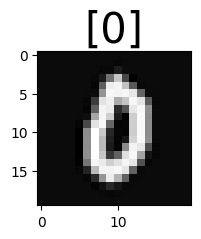

In [10]:

# choose the index of image to show out of 5000 images
idx = 75

# choose figure size
plt.figure(figsize=(40,2))

# convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(x[idx], (20, 20)).T, cmap='gray')

# add the label of image as the title of figure
plt.title(str(y[idx]), fontsize = 30)



In [11]:
# print shapes of x and y
print("shape of x:", x.shape)
print("shape of x[idx]:", x[idx].shape)
print("shape of y:", y.shape)


shape of x: (5000, 400)
shape of x[idx]: (400,)
shape of y: (5000, 1)


In [12]:

# shuffle and then Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42 , shuffle=True)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# printing the shapes of X and Y train and test
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)

shape of X_train: (4000, 400)
shape of Y_train: (4000, 1)
shape of X_test: (1000, 400)
shape of Y_test: (1000, 1)


In [14]:
# we are implementing a 3 layer neural network

model = Sequential ([
    Dense(400 , activation = "relu" , name = "input_layer"),
    Dense(25 , activation = "relu" , name = "hidden_layer"),
    Dense(10 , activation = "softmax" , name = "output_layer")]
)

###########################################################################################

model.compile(
    optimizer = Adam(1e-3) ,
    loss = SparseCategoricalCrossentropy())

############################################################################################

model.fit(X_train,Y_train,epochs=100)
  

Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.6621
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1794
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 10/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 11/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 12/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 13/100


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 400)                 160400    
                                                                 
 hidden_layer (Dense)        (32, 25)                  10025     
                                                                 
 output_layer (Dense)        (32, 10)                  260       
                                                                 
Total params: 170685 (666.74 KB)
Trainable params: 170685 (666.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
our_num=int(input("please choose the number out of 1000 images to predict : " ))

In [24]:
# Make predictions

# as we know the test size is 1000
Y_pred = model.predict(X_test)
print(Y_pred[our_num])
#the outcome should be a probability

32/32 [==============================] - 0s 1ms/step
[4.4816607e-20 2.4624389e-25 1.7451327e-24 5.5583849e-18 4.6975953e-22
 4.6546418e-22 7.0853243e-25 1.0000000e+00 3.2704475e-19 2.8537394e-14]


In [25]:
#lets see what is the highest probability
predicted_digit = np.argmax(Y_pred[our_num])
print("predicted digit: ", predicted_digit)

predicted digit:  7


the real number was : 


Text(0.5, 1.0, '[7]')

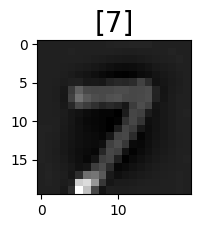

In [26]:
#lets see if the predicted digit is right

#choose figure size
print("the real number was : ")
plt.figure(figsize=(20,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X_test[our_num], (20, 20)).T, cmap='gray')

#add the label of image as the title of figure
plt.title(str(Y_test[our_num]), fontsize = 20)



In [28]:
# lets calculate the accuracy of our model
Y_pred2 = model.predict(X_test)

accuracy = np.sum(Y_pred2 == Y_test) / len(Y_test)
print("Percent of Accuracy : ", accuracy*1000)

32/32 [==============================] - 0s 2ms/step
Percent of Accuracy :  84.0
